### **2.3 Feature Selection**
Steps:
1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.
2. Apply Recursive Feature Elimination (RFE) to select the best predictors.
3. Use Chi-Square Test to check feature significance.
4. Select only the most relevant features for modeling.

Deliverable:
- Reduced dataset with selected key features
- Feature importance ranking visualization

#### **Prepare Features and Target Column**

In [ ]:
# Define target column
target_col = "num"

y = df[target_col] # The target column
X = df.drop(columns=[target_col]) # The Original dataset without the target column

# Check results
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (303, 18)
y shape: (303,)


,age,trestbps,chol,thalach,oldpeak,ca,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67,160,286,108,1.5,3,1,0,0,1,0,0,1,1,1,0,0,0
2,67,120,229,129,2.6,2,1,0,0,1,0,0,1,1,1,0,0,1
3,37,130,250,187,3.5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41,130,204,172,1.4,0,0,1,0,0,0,0,1,0,0,0,0,0


#### **Step 1: Feature Importance (Random Forest)**

Random Forest can tell you which features contribute most to predicting the target.

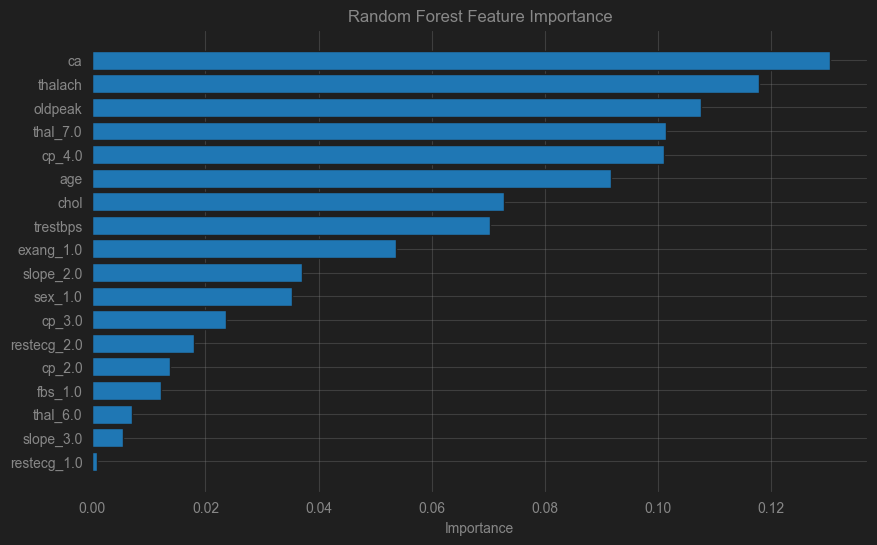

In [87]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=PRIMARY_COLOR, edgecolor=EDGE_COLOR)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

#### **Step 2: Recursive Feature Elimination (RFE)**

RFE iteratively removes the least important feature until the desired number of features is reached.

In [88]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=8)  # We can change the number of features if we want
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_7.0']


#### **Step 3: Chi-Square Test (for categorical features / classification)**

Chi-Square tests association between each feature and the target.

In [89]:
chi_scores, p_values = chi2(X, y)

chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

chi_df

,Feature,Chi2 Score,p-value
3,thalach,183.821471,7.097172e-42
5,ca,84.115181,4.667726e-20
4,oldpeak,70.572550,4.436474e-17
17,thal_7.0,42.958360,5.591745e-11
9,cp_4.0,42.410097,7.400700e-11
13,exang_1.0,38.052613,6.886243e-10
2,chol,23.802935,1.067196e-06
0,age,22.562319,2.034358e-06
8,cp_3.0,21.551109,3.445235e-06
14,slope_2.0,20.624160,5.588639e-06


#### **Step 4: Select the most relevant features**

Combine results from Feature Importance, RFE, and Chi-Square test to choose key features.

In [90]:
top_features = list(set(selected_features) & set(feature_importances['Feature'][:10]) & set(chi_df['Feature'][:10]))
X_reduced = X[top_features]

print(top_features)
print("Reduced dataset shape:", X_reduced.shape)

['ca', 'age', 'thalach', 'oldpeak', 'cp_4.0', 'chol', 'thal_7.0']
Reduced dataset shape: (303, 7)
